In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import seaborn as sns

In [2]:
directory = "./Datasets/Nirf"

engg = {}
overall = {}

for i in ['2016','2017','2018','2019','2020','2021']:
  try:
    data_engg = pd.read_csv(directory+f"/{i}/EngineeringRanking_{i}.csv", encoding='unicode_escape')
    engg[i]=data_engg
  except:
    pass
  
  try:
    data_overall = pd.read_csv(directory+f"/{i}/OverallRanking_{i}.csv",encoding="unicode_escape")
    overall[i]=data_overall
  except:
    pass 

# Overall

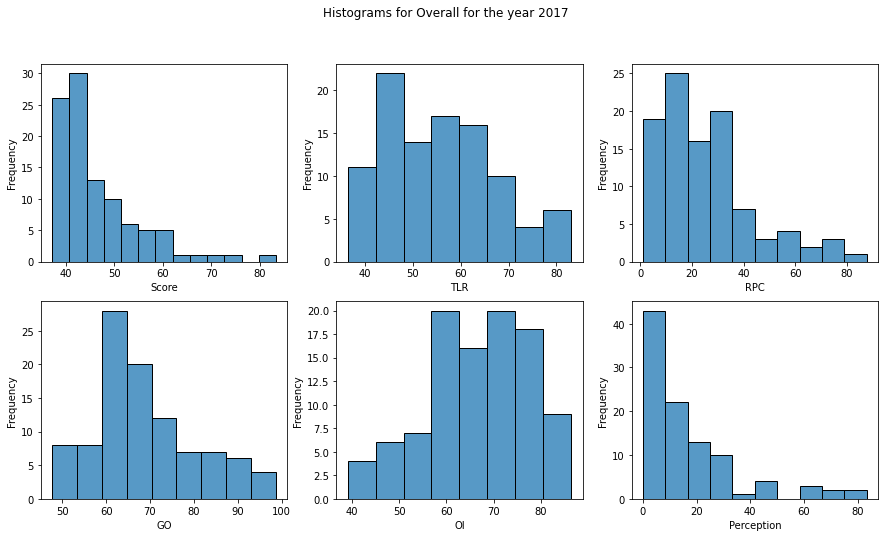

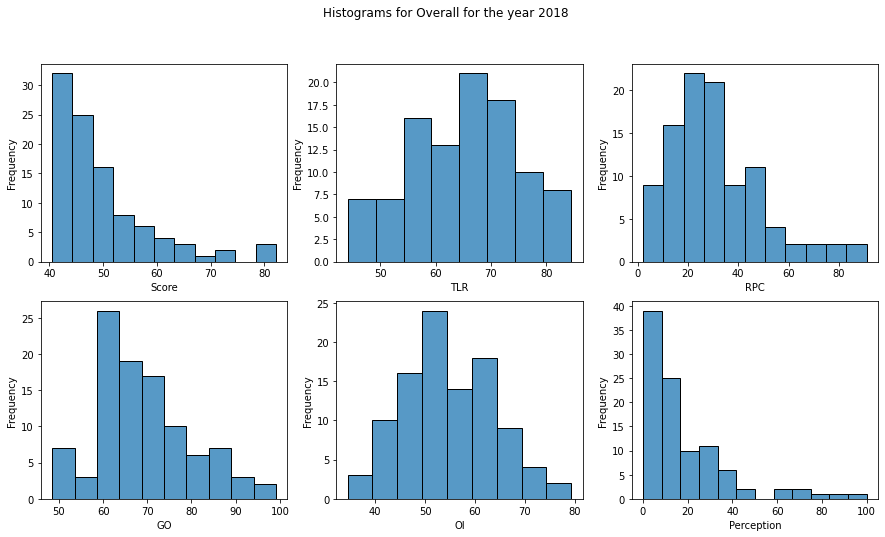

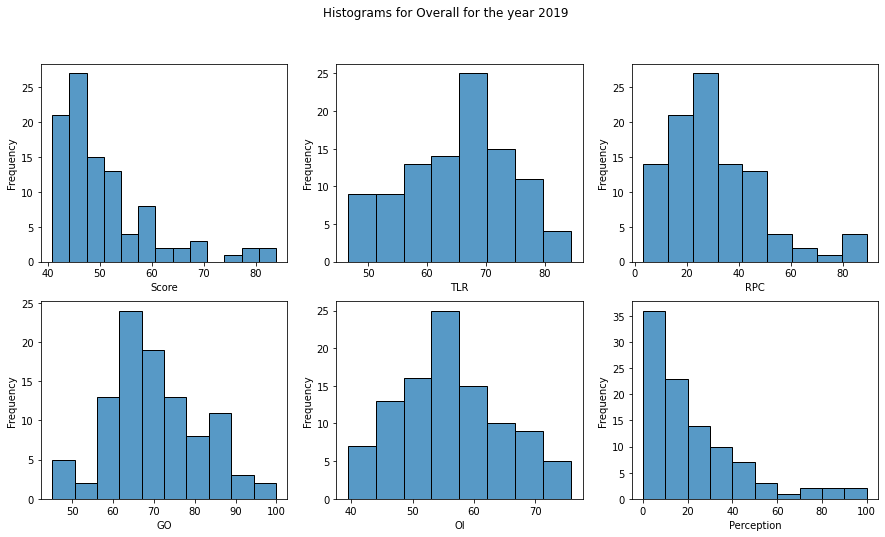

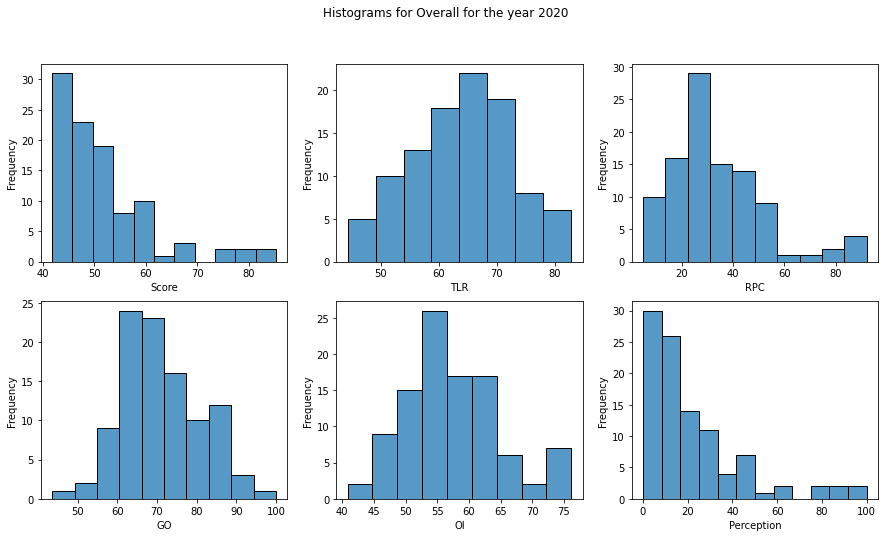

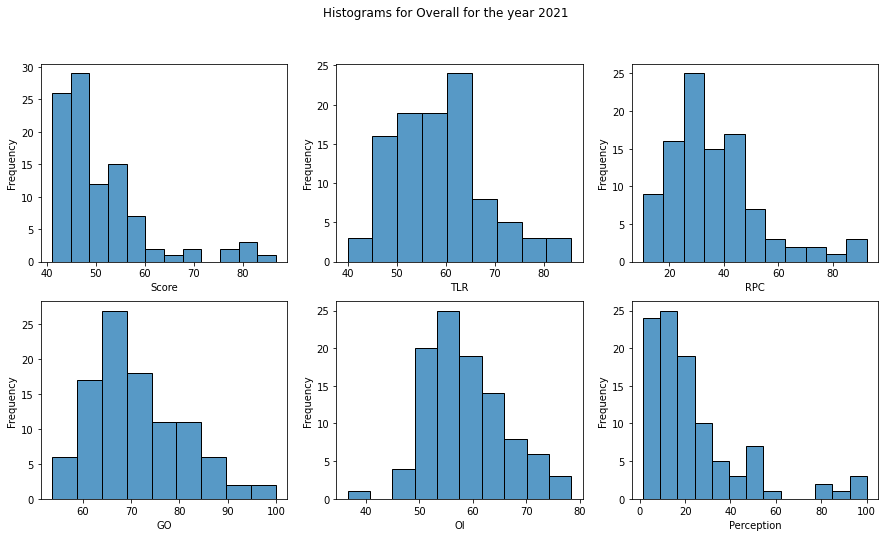

In [3]:
plt.rcParams["figure.figsize"] = (15,8)
for k in overall.keys():
  data = overall[k]
  cols=['Score','Rank','TLR','RPC','GO','OI','Perception']
  stat_data = data[cols]
  cols =['Score','TLR','RPC','GO','OI','Perception']
  plt.figure()
  plt.suptitle(f"Histograms for Overall for the year {k}")
  for i in range(len(cols)):
    plt.subplot(2,3,i+1)
    sns.histplot(stat_data[cols[i]], bins='auto')
    plt.xlabel(f"{cols[i]}")
    plt.ylabel(f"Frequency")
  plt.show()


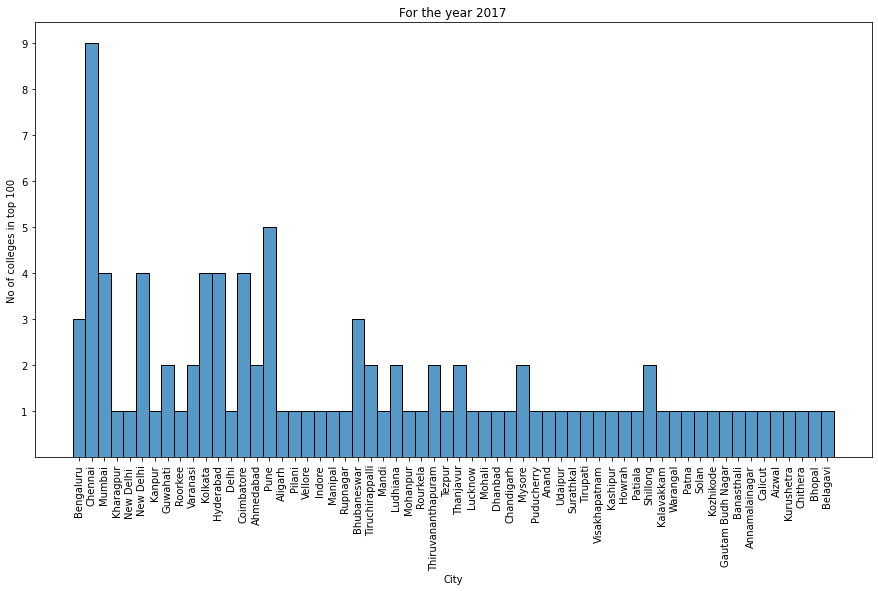

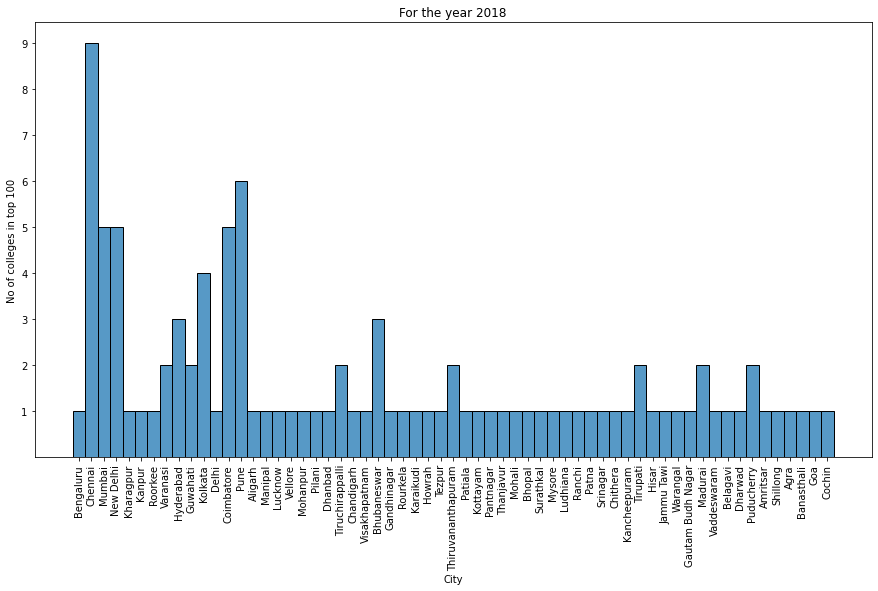

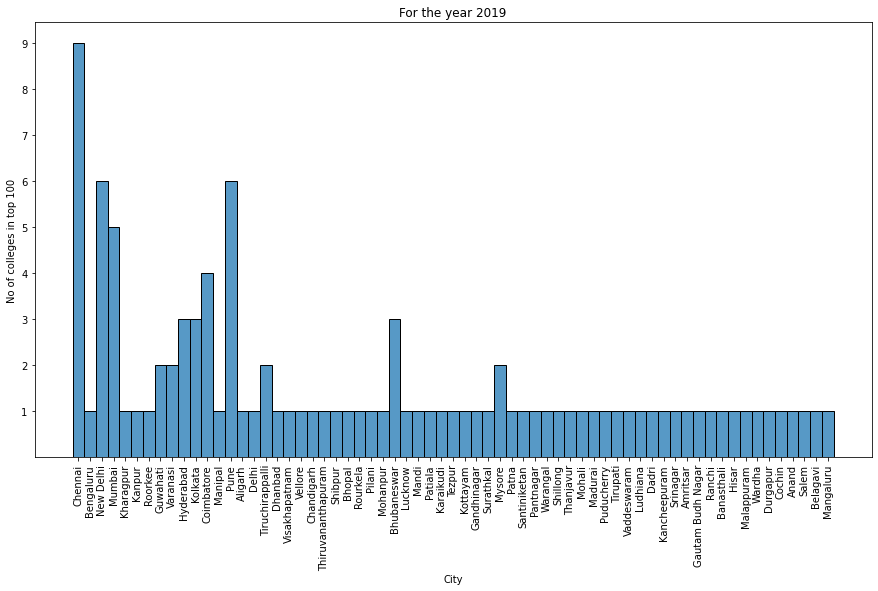

C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Lenovo\AppData\Local\Programs\Python\Python39\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 13 missing from current font.
  font.set_text(s, 0, flags=flags)


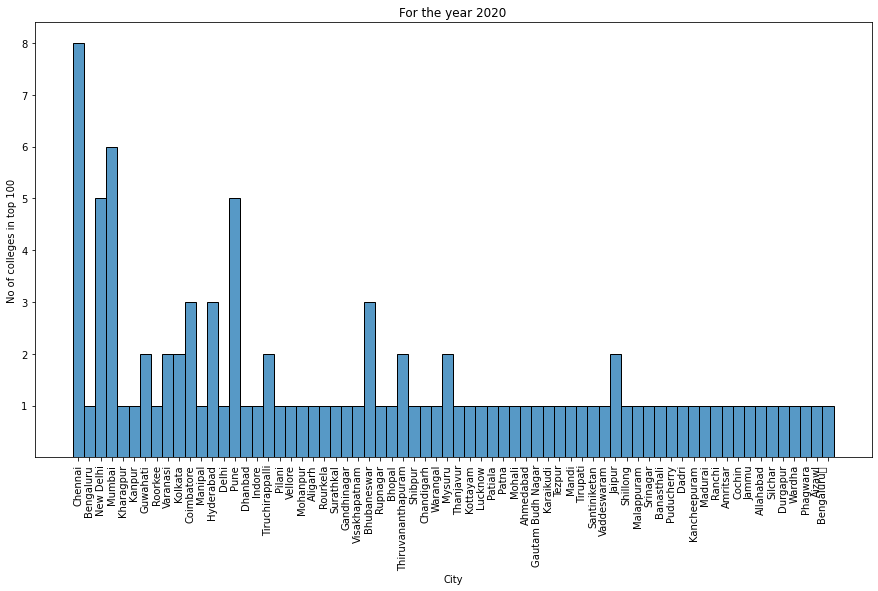

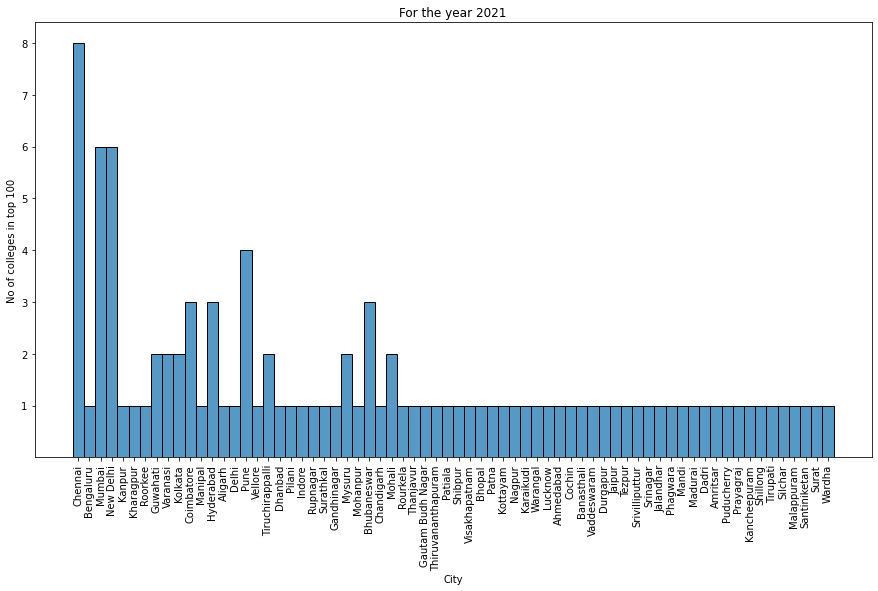

In [4]:
for i in overall.keys():
    val = overall[i]
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,36))
    plt.xlabel("City")
    plt.ylabel("No of colleges in top 100")
    sns.histplot(val['City'], bins='auto')
    plt.show()

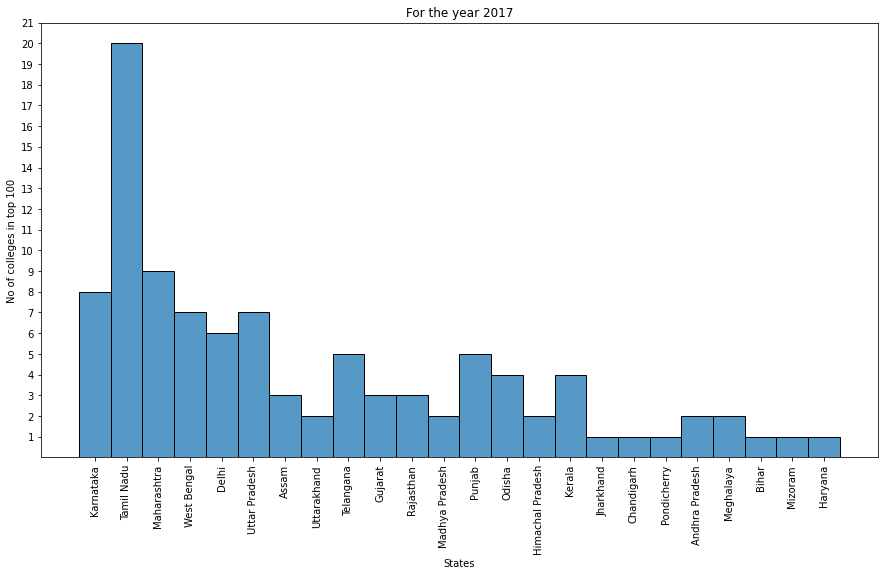

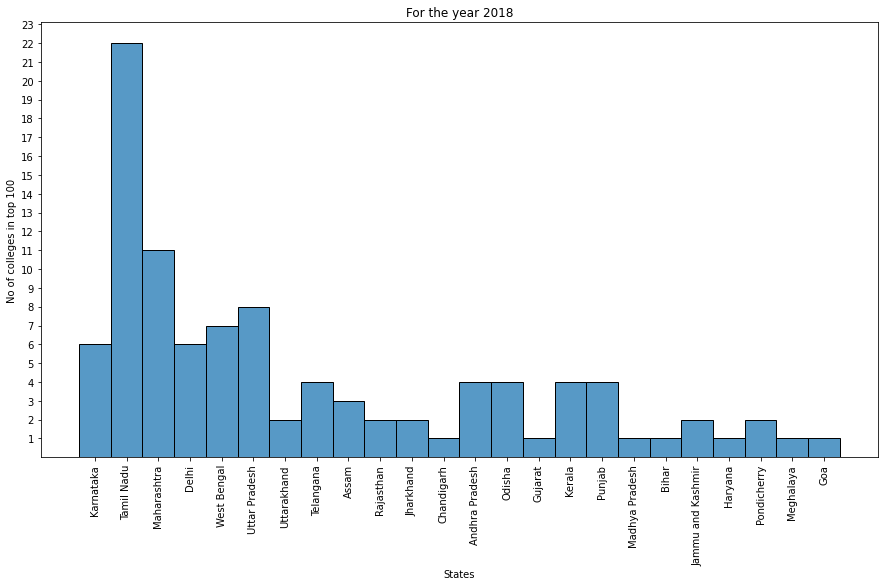

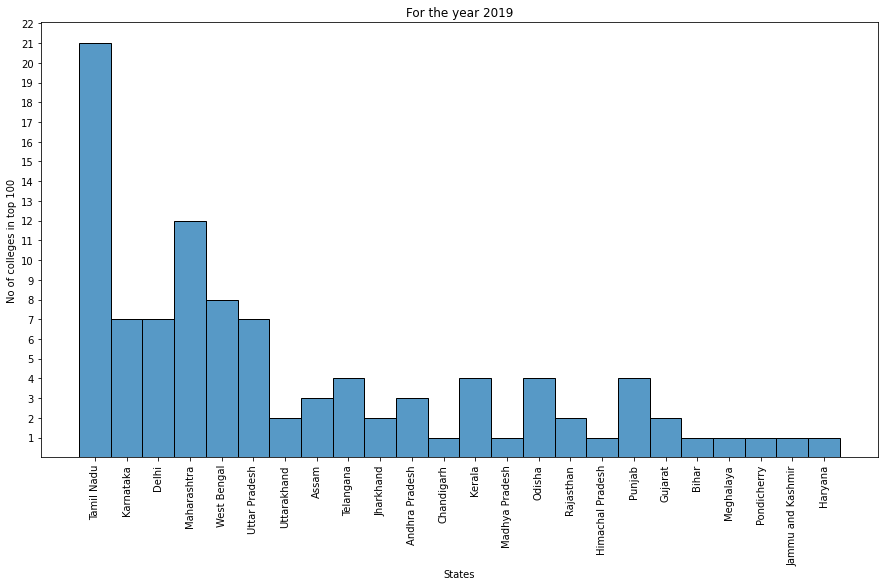

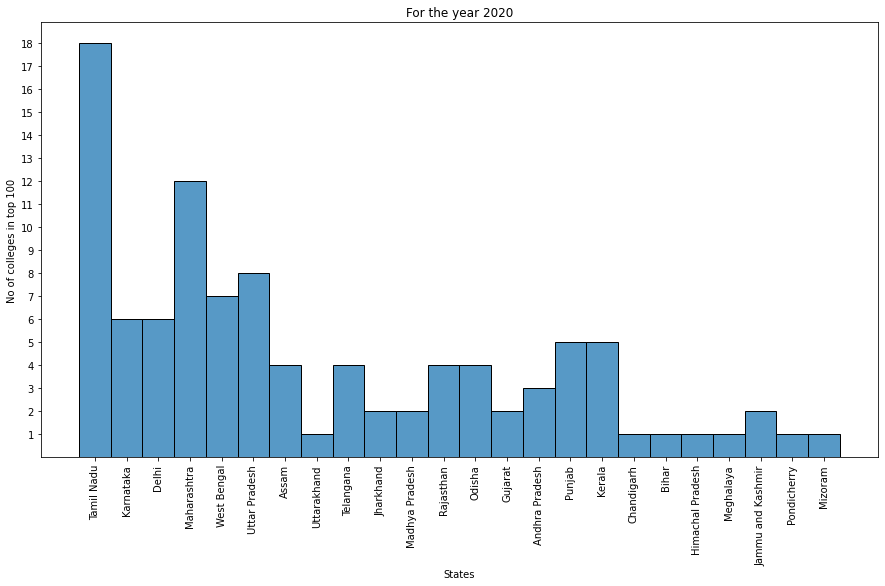

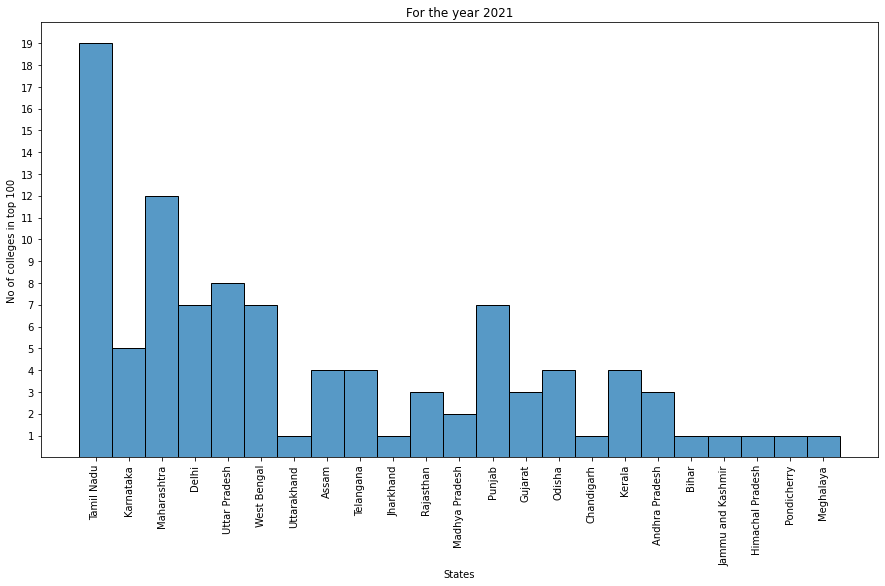

In [5]:
for i in overall.keys():
    val = overall[i]
    plt.title(f"For the year {i}")
    plt.xticks(rotation='vertical')
    plt.yticks(range(1,36))
    plt.xlabel("States")
    plt.ylabel("No of colleges in top 100")
    sns.histplot(val['State'], bins='auto')
    plt.show()

In [6]:
data = pd.DataFrame()
for i in overall.keys():
    curr = overall[i].assign(year=i)
    data = pd.concat([data,curr], axis=0)


In [7]:
top10data = data.query('Rank<=10')

In [8]:
display(top10data.head(5))

,Institute Id,Institute Name,City,State,Score,Rank,TLR,RPC,GO,OI,Perception,year
0,IR17-I-2-18243,Indian Institute of Science Bangalore,Bengaluru,Karnataka,83.28,1,83.11,87.59,87.97,61.48,83.33,2017
1,IR17-I-1-1-77,Indian Institute of Technology Madras,Chennai,Tamil Nadu,73.97,2,69.49,72.60,84.02,76.75,68.70,2017
2,IR17-I-2-18633,Indian Institute of Technology Bombay,Mumbai,Maharashtra,71.78,3,64.68,78.14,70.07,65.80,83.44,2017
3,IR17-I-2-18630,Indian Institute of Technology Kharagpur,Kharagpur,West Bengal,68.43,4,55.07,70.46,85.11,72.85,64.72,2017
4,IR17-I-2-1-79,Indian Institute of Technology Delhi,New Delhi,Delhi,64.18,5,55.45,68.48,65.92,68.69,69.53,2017


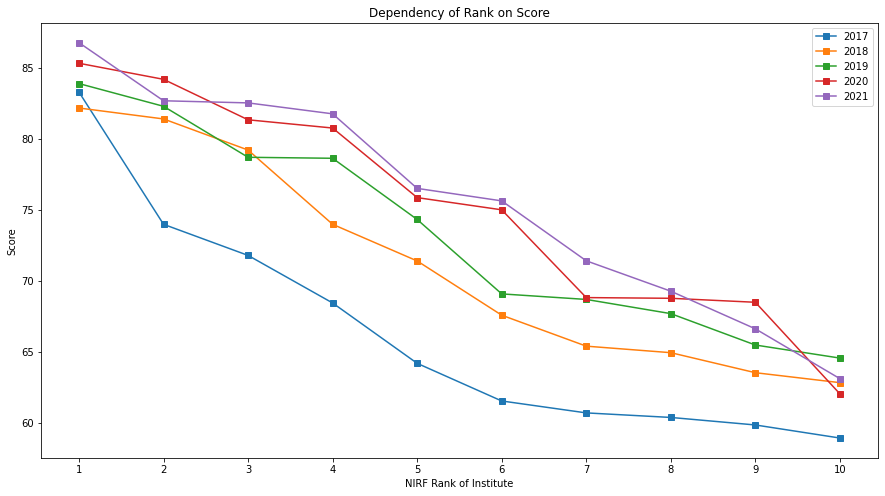

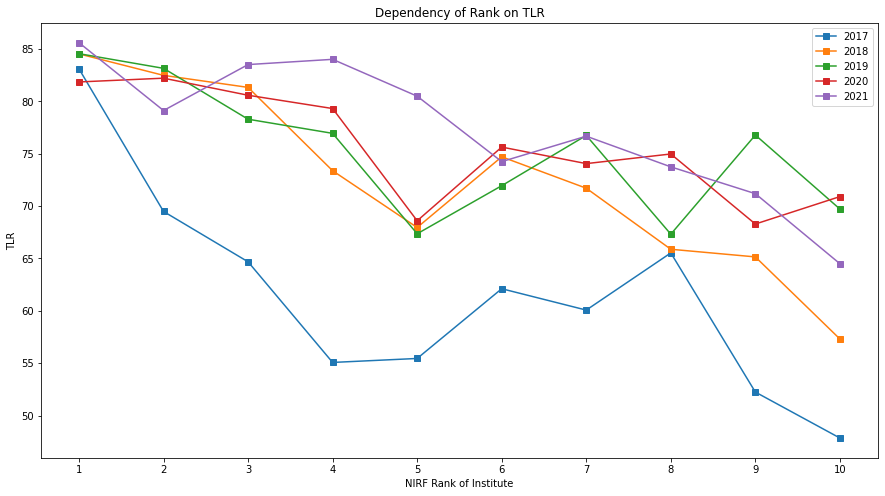

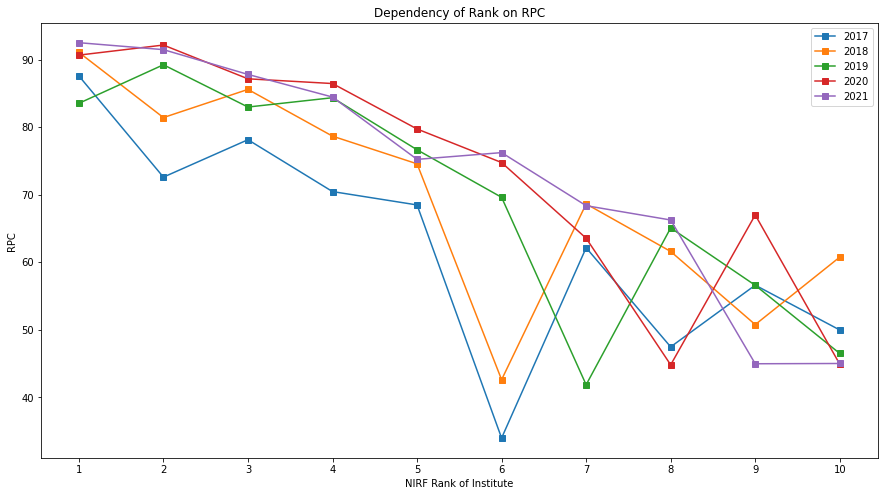

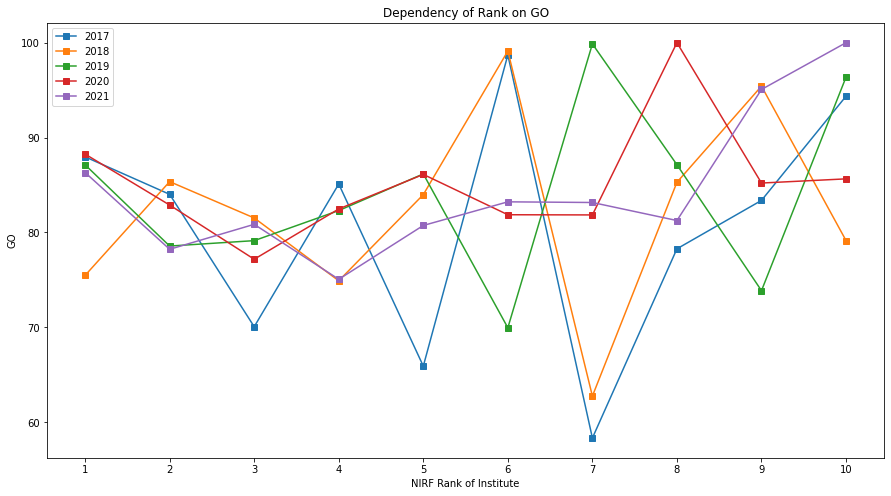

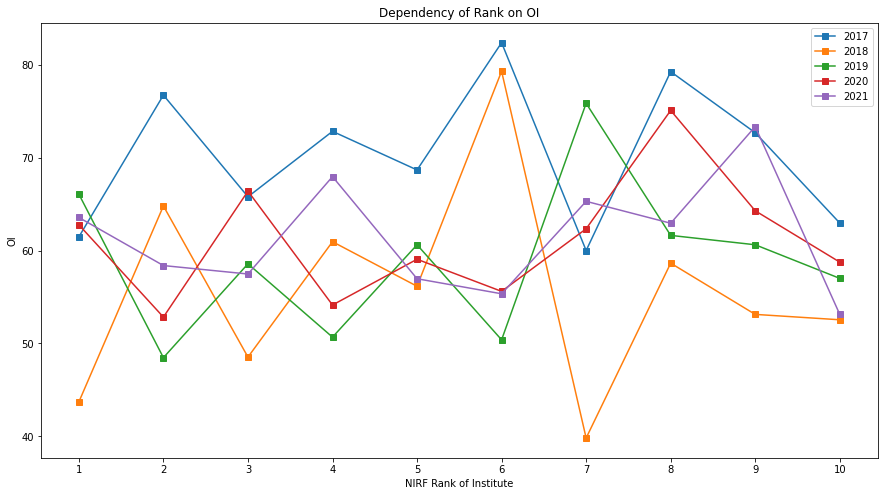

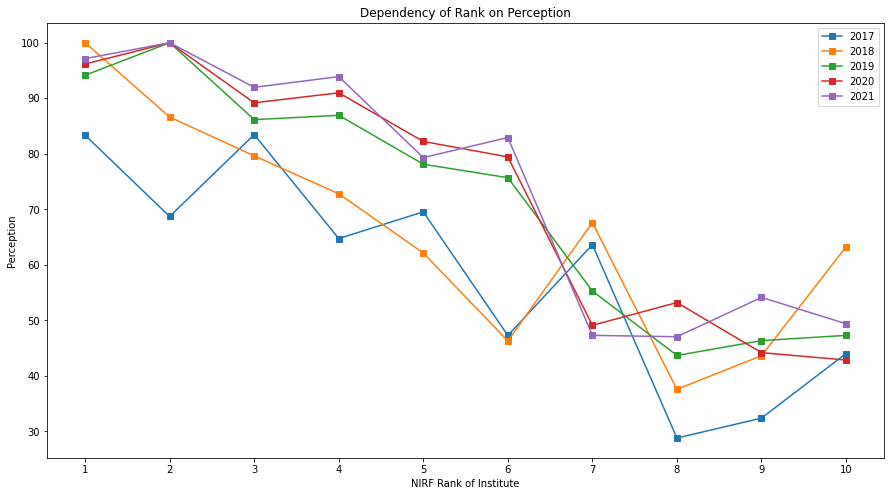

In [9]:
k=['Score','TLR','RPC','GO','OI','Perception']
for x in k:
    for i,j in top10data.groupby('year'):
        plt.plot(j['Rank'],j[f"{x}"],'s-',label=f"{i}")
    plt.title(f"Dependency of Rank on {x}")
    plt.ylabel(f"{x}")
    plt.xlabel("NIRF Rank of Institute")
    plt.xticks(range(1,11))
    plt.legend()
    plt.show()

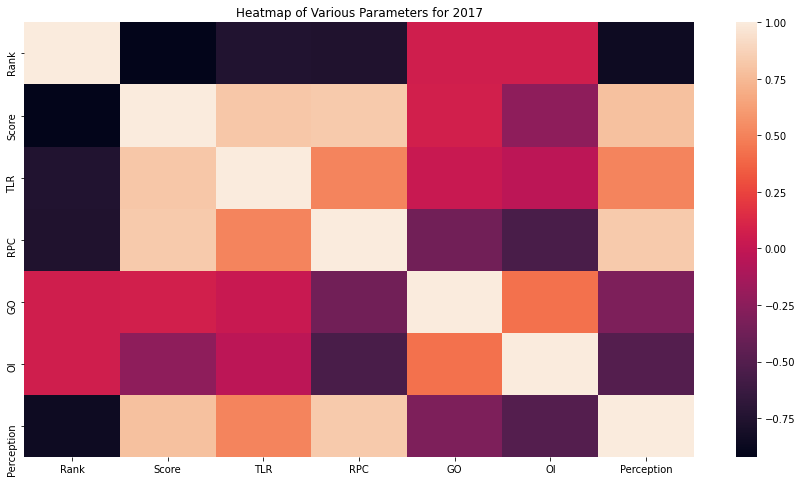

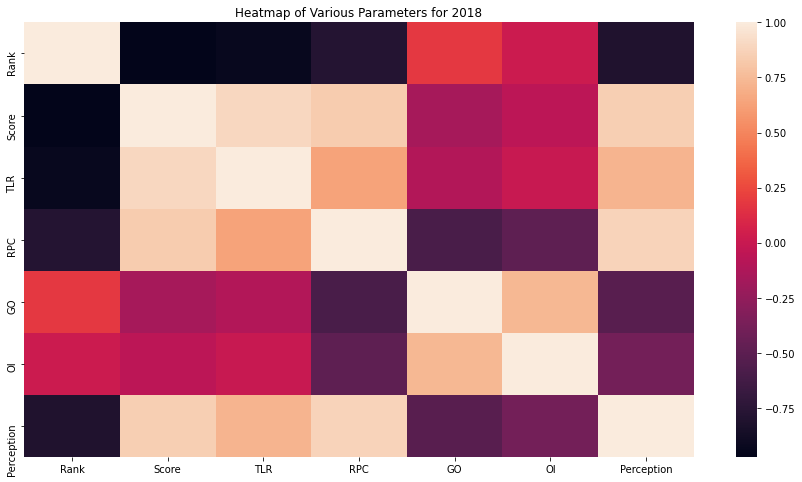

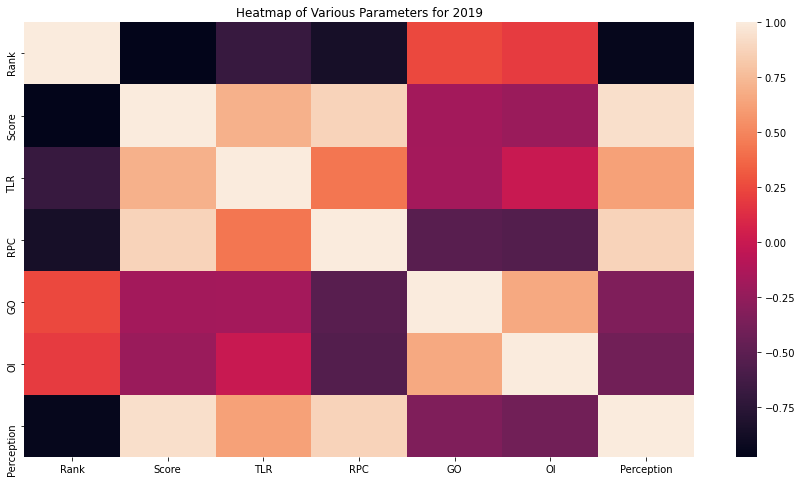

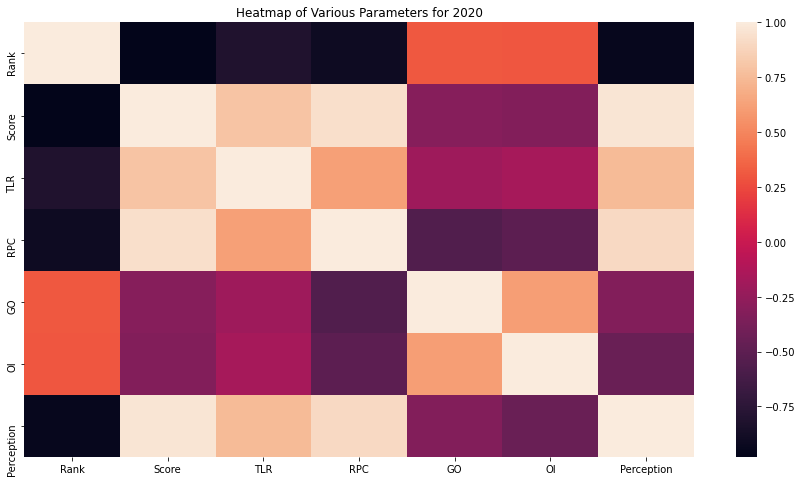

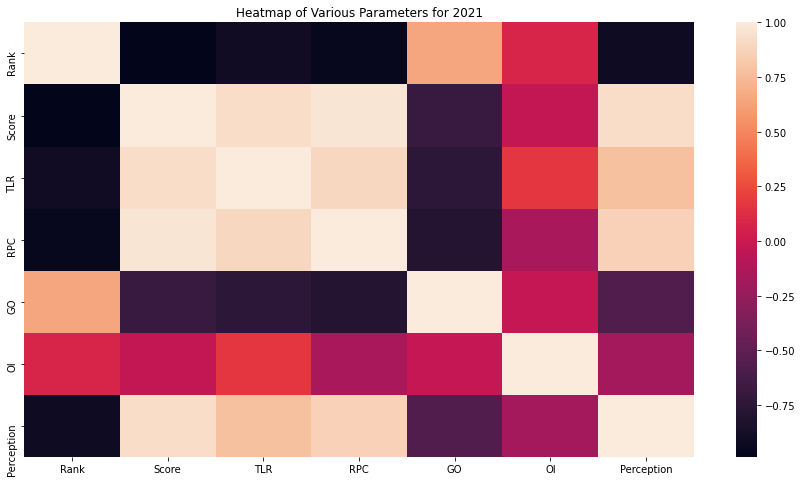

In [10]:
k=['Rank','Score','TLR','RPC','GO','OI','Perception']
for i,j in top10data.groupby('year'):
    plt.title(f"Heatmap of Various Parameters for {i}")
    sns.heatmap(j[k].corr())
    plt.show()